# Build a CALSPEC list of observable target from getCalspec package and generate sky trajectories and plot

- Author Sylvie Dagoret-Campagne
- Creation : August 22th 2023
- Update : August 23th 2023 : all bug corrected

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.ticker as ticker
%matplotlib inline
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from astroquery.simbad import Simbad

In [4]:
# to view the list of VOTABLE
# Simbad.list_votable_fields()

In [5]:
Simbad.add_votable_fields('sptype')
Simbad.add_votable_fields('flux(U)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(B)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(V)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(R)') # add the Vega unit Magnitude 
Simbad.add_votable_fields('flux(I)') # add the Vega unit Magnitude 
#Simbad.add_votable_fields('flux_unit(V)')
#Simbad.add_votable_fields('flux_unit(I)')
#Simbad.add_votable_fields('flux_system(V)')
#Simbad.add_votable_fields('flux_system(I)')
#Simbad.add_votable_fields('ubv')  # Johnson UBV system

In [6]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

## CALSPEC

Use the package getCalspec to work on CALSPEC object

https://github.com/LSSTDESC/getCalspec/blob/main/getCalspec/getCalspec.py

https://github.com/LSSTDESC/getCalspec/tree/main/getCalspec

In [7]:
# to get all Calspec data in one time in cache, write¶
from getCalspec.rebuild import rebuild_cache
# rebuild_cache()

In [8]:
# When the STSC webpage is updated, it might be necessary to rebuild the calspec_data/calspec.csv table and the cache:¶
from getCalspec.rebuild import rebuild_tables, rebuild_cache
#rebuild_tables()
#rebuild_cache()

### Retrieve all calspec

Try directly reading the table from getCalspec package. If not possible, read directly this table from the table stored in filename = "../../calspec_data/calspec.csv"

In [9]:
from getCalspec.getCalspec import getCalspecDataFrame

In [10]:
flag_getscalspec = False
try:
    df = getCalspecDataFrame()
    flag_getscalspec = True
except:
    filename = "../../calspec_data/calspec.csv"
    df = pd.read_csv(filename,index_col=0)  
finally:
    print(f"getCalspec : {flag_getscalspec}")
    print(df.head())   

getCalspec : True
   Unnamed: 0 Star_name   Sp_T      V    B_V     Name     Model          STIS  \
0           0   109 VIR  A0III   3.73  -0.01   109vir  _mod_003     _stis_003   
1           1    10 LAC    O9V   4.88  -0.21    10lac  _mod_005     _stis_007   
2           2  16 CYG B    G3V   6.20   0.66   16cygb  _mod_003     _stis_003   
3           3    18 SCO    G2V   5.50   0.65    18sco  _mod_004     _stis_004   
4           4   1732526    A4V  12.53   0.12  1732526  _mod_005  _stisnic_007   

  Var_(%)            RA          Decl    Vr      PM    PM.1  \
0     NaN  14 46 14.925  +01 53 34.38  -6.1 -114.03  -22.13   
1   <0.23  22 39 15.679  +39 03 00.97 -10.0   -0.32   -5.46   
2   <0.21  19 41 51.973  +50 31 03.09 -27.7 -134.79 -162.49   
3     NaN  16 15 37.270  -08 22 09.98  11.9  232.16 -495.37   
4    1.40  17 32 52.630  +71 04 43.12   NaN    0.22   -2.71   

               Simbad_Name  Alt_Simbad_Name  Astroquery_Name Alt_Star_name  \
0                 HD130109            

In [11]:
df

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name
0,0,109 VIR,A0III,3.73,-0.01,109vir,_mod_003,_stis_003,NaN,14 46 14.925,+01 53 34.38,-6.1,-114.03,-22.13,HD130109,NaN,* 109 VIR,NaN,HD130109
1,1,10 LAC,O9V,4.88,-0.21,10lac,_mod_005,_stis_007,<0.23,22 39 15.679,+39 03 00.97,-10.0,-0.32,-5.46,NaN,NaN,* 10 LAC,NaN,HD214680
2,2,16 CYG B,G3V,6.20,0.66,16cygb,_mod_003,_stis_003,<0.21,19 41 51.973,+50 31 03.09,-27.7,-134.79,-162.49,HD186427,NaN,* 16 CYG B,NaN,HD186427
3,3,18 SCO,G2V,5.50,0.65,18sco,_mod_004,_stis_004,NaN,16 15 37.270,-08 22 09.98,11.9,232.16,-495.37,HD146233,NaN,* 18 SCO,NaN,HD146233
4,4,1732526,A4V,12.53,0.12,1732526,_mod_005,_stisnic_007,1.40,17 32 52.630,+71 04 43.12,NaN,0.22,-2.71,2MASS J17325264+7104431,TYC 4424-1286-1,TYC 4424-1286-1,NaN,NaN
5,5,1740346,A6V,12.48,0.20,1740346,NaN,_stisnic_005,NaN,17 40 34.679,+65 27 14.77,NaN,-5.72,-3.44,2MASS J17403468+6527148,TYC 4207-219-1,TYC 4207-219-1,NaN,NaN
6,6,1743045,A8III,13.52,0.28,1743045,_mod_005,_stisnic_007,<1.32,17 43 04.486,+66 55 01.66,NaN,1.10,-2.79,2MASS J17430448+6655015,NaN,2MASS J17430448+6655015,NaN,NaN
7,7,1757132,A3V,12.01,-0.10,1757132,_mod_005,_stiswfc_004,<0.37,17 57 13.233,+67 03 40.77,NaN,0.41,-14.03,2MASS J17571324+6703409,TYC 4212-455-1,TYC 4212-455-1,NaN,NaN
8,8,1802271,A2V,11.53,0.02,1802271,_mod_005,_stiswfcnic_004,<0.82,18 02 27.163,+60 43 35.54,NaN,5.40,2.17,2MASS J18022716+6043356,TYC 4201-1542-12,BPS BS 17447-0067,NaN,NaN
9,9,1805292,A4V,12.28,0.14,1805292,_mod_004,_stisnic_006,<0.49,18 05 29.275,+64 27 52.13,NaN,-1.64,10.06,2MASS J18052927+6427520,TYC 4209-1396-1,TYC 4209-1396-1,NaN,NaN


In [12]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo,TimeDelta

In [13]:
from datetime import datetime
import timezonefinder, pytz
from calendar import monthrange
import calendar

## Calculate the Visibility of the star

### Observation date

In [14]:
NYEAR=2023
NMONTH=9
NDAY=12

### Examples from https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

In [15]:
m33 = SkyCoord.from_name('M33')

In [16]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2023-9-12 23:00:00') - utcoffset

In [17]:
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")

M33's Altitude = 4.1e+01 deg


## My Location

In summer the UTC offset at my location is + 2 H

In [18]:
mylat = 48.8534
mylong = 2.3488

In [19]:
paris = EarthLocation(lat=mylat*u.deg, lon=mylong*u.deg, height=0*u.m)
utcoffset = 2*u.hour  # CET
time = Time('2023-9-12 23:00:00') - utcoffset

In [20]:
tf = timezonefinder.TimezoneFinder()
mytimezone_str = tf.certain_timezone_at(lat=mylat, lng=mylong)

In [21]:
mytimezone_str

'Europe/Paris'

In [22]:
if mytimezone_str is None:
    print("Could not determine my time zone")
else:
    # Display the current time in that time zone
    
    
    timezone = pytz.timezone(mytimezone_str)
    timezone0 = pytz.timezone('UTC')
    
    dt = datetime.utcnow()
    timeParis_now = datetime.now(timezone)
    
    print("The UTC Time now %s" % dt)
    print("The actual time in %s is %s" % (mytimezone_str, dt + timezone.utcoffset(dt)))

The UTC Time now 2023-08-23 15:02:44.708634
The actual time in Europe/Paris is 2023-08-23 17:02:44.708634


### For LSST

### Observation location

In [23]:
LSSTNAME='Cerro Pachon'
lsst_location=EarthLocation.of_site(LSSTNAME)
longitude=lsst_location.lon
latitude=lsst_location.lat
altitude=lsst_location.height

In [24]:
cerro_pachon = EarthLocation(lat=latitude.degree*u.deg, lon=longitude.degree*u.deg, height=altitude)

### Determination of UTC offset from TimeZone in Chile

In [25]:
tf = timezonefinder.TimezoneFinder()
timezone_str = tf.certain_timezone_at(lat=latitude.degree, lng=longitude.degree)

In [26]:
print(f"Time zone at Rubin LSST Observatory: {timezone_str}")

Time zone at Rubin LSST Observatory: America/Santiago


In [27]:
if timezone_str is None:
    print("Could not determine the time zone")
else:
    # Display the current time in that time zone
    
    #tz = pytz.timezone('Europe/Berlin')
    #berlin_now = datetime.now(tz)
    
    timezone = pytz.timezone(timezone_str)
    timezone0 = pytz.timezone('UTC')
    
    dt = datetime.utcnow()
    timeChile_now = datetime.now(timezone)
    
    print("The UTC Time now %s" % dt)
    print("The actual time in %s is %s" % (timezone_str, dt + timezone.utcoffset(dt)))

The UTC Time now 2023-08-23 15:02:45.022742
The actual time in America/Santiago is 2023-08-23 11:02:45.022742


In [28]:
utcoffset=timezone.utcoffset(dt).total_seconds()/60./60.
print("The UTC offset in Chile is ",utcoffset," hours")

The UTC offset in Chile is  -4.0  hours


In [29]:
tz_utc_minus_xx_hours = TimezoneInfo(utc_offset=int(utcoffset)*u.hour)
tz_utc_minus_xx_hours

In [30]:
timezone.utcoffset

<bound method DstTzInfo.utcoffset of <DstTzInfo 'America/Santiago' LMT-1 day, 19:17:00 STD>>

### Night of observation

In [31]:
night_obs = datetime(NYEAR, NMONTH, NDAY, 0, 0)
night_obs_midnight= datetime(NYEAR, NMONTH, NDAY, 23, 59,59,tzinfo = tz_utc_minus_xx_hours)

In [32]:
night_obs_str=night_obs.strftime("%Y-%m-%d %H:%M:%S")
print(f"Night of Observation : {night_obs_str}")

Night of Observation : 2023-09-12 00:00:00


In [33]:
night_obs_midnight_str=night_obs_midnight.strftime("%Y-%m-%d %H:%M:%S")
night_obs_midnight_str
print(f"Midnight of Night of Observation : {night_obs_midnight_str}")

Midnight of Night of Observation : 2023-09-12 23:59:59


### Compute UTC and Sideral Time at local midnight

In [34]:
tz_utc = TimezoneInfo() 
print("Local time in Santiago in summer (GMT-4) in summer : ",night_obs_midnight)
print("Time in UTC                               : ",night_obs_midnight.astimezone(tz_utc))

Local time in Santiago in summer (GMT-4) in summer :  2023-09-12 23:59:59-04:00
Time in UTC                               :  2023-09-13 03:59:59+00:00


### Sideral time at LSST site midnight

In [35]:
t_lsst = Time(night_obs_midnight.astimezone(tz_utc), scale='utc',location=lsst_location)
t_sidereal_lsst = t_lsst.sidereal_time('apparent')  
print("Sideral Time at LSST midnight:",t_sidereal_lsst)

Sideral Time at LSST midnight: 22h44m36.72873971s


In [36]:
print("Sideral Time angle at LSST midnight:",Angle(t_sidereal_lsst).to(u.degree))

Sideral Time angle at LSST midnight: 341d09m10.93109565s


In [37]:
print("Sideral Time angle at LSST midnight:",Angle(t_sidereal_lsst).degree)

Sideral Time angle at LSST midnight: 341.153036415458


In [38]:
# To check
t_lsst_2 = Time('2023-09-13 03:59:59', scale='utc',location=('-70.73668333d', '-30.24074167d'))
t_lsst_2.sidereal_time('apparent') 

<Longitude 22.74353576 hourangle>

## Filter Obervable targets according RA and magnitude and culmination angle

- Select the target which Right-Asccention is +/- 6 hours from the sideral time

- The culmination Hour angle at the meridian must not be less than -6H to + 6H

### Criteria on Margin Angle

In [39]:
MarginAngle = Angle(6.0,u.hour)
MarginAngle

<Angle 6. hourangle>

In [40]:
#calculate tdege range of RA target to be visible within the MarginAngle
ra_min = (t_sidereal_lsst - MarginAngle).degree
ra_max = (t_sidereal_lsst + MarginAngle).degree

In [41]:
ra_min

251.15303641545802

In [42]:
ra_max

431.15303641545796

In [43]:
ra_max

431.15303641545796

In [44]:
ra_min_angle = Angle(ra_min,u.degree)
ra_max_angle = Angle(ra_max,u.degree)

### Criteria on culmination angle

In [45]:
culmin_angle_min = 45

### Criteria on magnitude in V

In [46]:
magLim = 12.

In [47]:
latitude

<Latitude -30.24074167 deg>

In [48]:
all_flag_select = []

# numeric collections
all_ra_angles_deg = []
all_dec_angles_deg = []
all_altmax_angle_deg = []
all_zenithmin_angle_deg = []
all_magV = []

# loop on rach entries in the df table to calculate angles

for index, row in df.iterrows(): 
    target_name = row["Star_name"]
    hd_name = row["HD_name"]
    
    # compute numeric values for ra-dec
    ra_angle = Angle(row['RA'],unit = u.hour) # the RA angle is a string in Sexagesimal hours 
    dec_angle = Angle(row["Decl"],unit = u.deg) # the dec angle is a string in degrees 
    
    # compute culmination angle
    if latitude.deg >= 0:
        if dec_angle.deg >= latitude.deg:
            zenith_angle =   dec_angle - latitude
        else:
            zenith_angle = latitude - dec_angle
    else:
        if dec_angle.deg < latitude.deg :
            zenith_angle =   latitude - dec_angle 
        else:
            zenith_angle =   dec_angle - latitude 
        
        
    
    
    culmination_angle = Angle(90.0, unit = u.deg) - zenith_angle
    
    if (index !=12) and (index !=13) and (index!= 95):
        magV = float(row["V"])
    else:
        if index == 12:
            magV =12.47
        elif index==13:
            magV = 13.80
        elif index == 95:
            magV = 17.01
            
             
    all_ra_angles_deg.append(ra_angle.degree)
    all_dec_angles_deg.append(dec_angle.degree)
    all_altmax_angle_deg.append(culmination_angle.degree) 
    all_zenithmin_angle_deg.append(zenith_angle.degree )
    all_magV.append(magV)
  
    
    flag1 = ra_angle.is_within_bounds(ra_min_angle,ra_max_angle)
    flag2 = (magV < magLim)
    flag3 = False
    
    if culmination_angle.degree > culmin_angle_min :
        flag3 = True
    
    flag = flag1 & flag2 & flag3
    
    if target_name == "HD185975":
        # keep polar star
        flag = True

    
    if flag:
        print(f"{index}, {target_name} ({hd_name}), RA = {ra_angle.hour:.2f} , DEC = {dec_angle.degree:.2f} , RA-MIN-MAX = {ra_min_angle.deg:.1f}-{ra_max_angle.deg:.1f},zenith_angle = {zenith_angle.degree:.2f}  culmination angle = {culmination_angle.degree:.2f} , magV = {magV} , flag_select = {flag}")
   
    all_flag_select.append(flag)                

16, BD+02 3375 (nan), RA = 17.66 , DEC = 2.42 , RA-MIN-MAX = 251.2-431.2,zenith_angle = 32.66  culmination angle = 57.34 , magV = 9.93 , flag_select = True
29, FEIGE110 (nan), RA = 23.33 , DEC = -5.17 , RA-MIN-MAX = 251.2-431.2,zenith_angle = 25.08  culmination angle = 64.92 , magV = 11.83 , flag_select = True
49, HD160617 (HD160617), RA = 17.71 , DEC = -40.32 , RA-MIN-MAX = 251.2-431.2,zenith_angle = 10.08  culmination angle = 79.92 , magV = 8.73 , flag_select = True
52, HD167060 (HD167060), RA = 18.30 , DEC = -61.71 , RA-MIN-MAX = 251.2-431.2,zenith_angle = 31.47  culmination angle = 58.53 , magV = 8.92 , flag_select = True
55, HD185975 (HD185975), RA = 20.47 , DEC = -87.47 , RA-MIN-MAX = 251.2-431.2,zenith_angle = 57.23  culmination angle = 32.77 , magV = 8.1 , flag_select = True
56, HD200654 (HD200654), RA = 21.11 , DEC = -49.96 , RA-MIN-MAX = 251.2-431.2,zenith_angle = 19.72  culmination angle = 70.28 , magV = 9.11 , flag_select = True
58, HD205905 (HD205905), RA = 21.65 , DEC = -

## Add calculated numerical values to the pandas table

In [49]:
df["ra_deg"] = all_ra_angles_deg
df["dec_deg"] = all_dec_angles_deg 
df["alt_max"] = all_altmax_angle_deg
df["zenith_min"] = all_zenithmin_angle_deg
df["magV"] = all_magV 

### Example for debug

In [50]:
cut = df["Star_name"] == "HD205905"

In [51]:
df[cut]

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name,ra_deg,dec_deg,alt_max,zenith_min,magV
58,58,HD205905,G2V,6.74,0.62,hd205905,_mod_006,_stis_008,0.26,21 39 10.151,-27 18 23.67,-17.0,384.1,-83.96,NaN,NaN,HD 205905,NaN,HD205905,324.792296,-27.306575,87.065833,2.934167,6.74


## Apply selection cut

In [52]:
df["select"] = all_flag_select
cut = df["select"] == True

t=df[cut]
NTargets=len(t)

In [53]:
t

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name,ra_deg,dec_deg,alt_max,zenith_min,magV,select
16,16,BD+02 3375,A5,9.93,0.45,bd02d3375,_mod_003,_stis_006,NaN,17 39 45.595,+02 24 59.61,-398.0,-366.01,75.12,NaN,NaN,BD+02 3375,NaN,NaN,264.939979,2.416558,57.342700,32.657300,9.93,True
29,29,FEIGE110,sdO,11.83,-0.30,feige110,NaN,_stisnic_008*,NaN,23 19 58.400,-05 09 56.17,NaN,-10.68,0.31,NaN,NaN,FEIGE 110,NaN,NaN,349.993333,-5.165603,64.924861,25.075139,11.83,True
49,49,HD160617,F,8.73,0.45,hd160617,_mod_002,_stis_005,NaN,17 42 49.324,-40 19 15.51,100.0,-62.39,-393.23,NaN,NaN,HD 160617,NaN,HD160617,265.705517,-40.320975,79.919767,10.080233,8.73,True
52,52,HD167060,G3V,8.92,0.64,hd167060,_mod_004,_stis_004,<0.09,18 17 44.143,-61 42 31.62,15.2,88.52,-145.15,NaN,NaN,HD 167060,NaN,HD167060,274.433929,-61.708783,58.531958,31.468042,8.92,True
55,55,HD185975,G3V,8.10,0.68,hd185975,_mod_004,_stis_007,NaN,20 28 18.740,-87 28 19.94,-19.0,169.76,-56.99,NaN,NaN,HD 185975,NaN,HD185975,307.078083,-87.472206,32.768536,57.231464,8.10,True
56,56,HD200654,G,9.11,0.63,hd200654,_mod_004,_stis_007,NaN,21 06 34.751,-49 57 50.28,-45.0,193.94,-273.89,NaN,NaN,HD 200654,NaN,HD200654,316.644796,-49.963967,70.276775,19.723225,9.11,True
58,58,HD205905,G2V,6.74,0.62,hd205905,_mod_006,_stis_008,0.26,21 39 10.151,-27 18 23.67,-17.0,384.10,-83.96,NaN,NaN,HD 205905,NaN,HD205905,324.792296,-27.306575,87.065833,2.934167,6.74,True


### Must reindex the table

In [54]:
t = t.reset_index(drop=True)

In [55]:
t

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name,ra_deg,dec_deg,alt_max,zenith_min,magV,select
0,16,BD+02 3375,A5,9.93,0.45,bd02d3375,_mod_003,_stis_006,NaN,17 39 45.595,+02 24 59.61,-398.0,-366.01,75.12,NaN,NaN,BD+02 3375,NaN,NaN,264.939979,2.416558,57.342700,32.657300,9.93,True
1,29,FEIGE110,sdO,11.83,-0.30,feige110,NaN,_stisnic_008*,NaN,23 19 58.400,-05 09 56.17,NaN,-10.68,0.31,NaN,NaN,FEIGE 110,NaN,NaN,349.993333,-5.165603,64.924861,25.075139,11.83,True
2,49,HD160617,F,8.73,0.45,hd160617,_mod_002,_stis_005,NaN,17 42 49.324,-40 19 15.51,100.0,-62.39,-393.23,NaN,NaN,HD 160617,NaN,HD160617,265.705517,-40.320975,79.919767,10.080233,8.73,True
3,52,HD167060,G3V,8.92,0.64,hd167060,_mod_004,_stis_004,<0.09,18 17 44.143,-61 42 31.62,15.2,88.52,-145.15,NaN,NaN,HD 167060,NaN,HD167060,274.433929,-61.708783,58.531958,31.468042,8.92,True
4,55,HD185975,G3V,8.10,0.68,hd185975,_mod_004,_stis_007,NaN,20 28 18.740,-87 28 19.94,-19.0,169.76,-56.99,NaN,NaN,HD 185975,NaN,HD185975,307.078083,-87.472206,32.768536,57.231464,8.10,True
5,56,HD200654,G,9.11,0.63,hd200654,_mod_004,_stis_007,NaN,21 06 34.751,-49 57 50.28,-45.0,193.94,-273.89,NaN,NaN,HD 200654,NaN,HD200654,316.644796,-49.963967,70.276775,19.723225,9.11,True
6,58,HD205905,G2V,6.74,0.62,hd205905,_mod_006,_stis_008,0.26,21 39 10.151,-27 18 23.67,-17.0,384.10,-83.96,NaN,NaN,HD 205905,NaN,HD205905,324.792296,-27.306575,87.065833,2.934167,6.74,True


In [56]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTargets)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTargets), alpha=1)

## Compute Target location before computing their sky trajectory

In [57]:
all_target_names = t["Astroquery_Name"]
print("order in selected target location")
print(all_target_names)
selected_target_locations = [ SkyCoord.from_name(target_name) for target_name in all_target_names]

order in selected target location
0    BD+02  3375
1      FEIGE 110
2      HD 160617
3      HD 167060
4      HD 185975
5      HD 200654
6      HD 205905
Name: Astroquery_Name, dtype: object


In [58]:
all_ra_astroquery=[]
all_dec_astroquery=[]
for target_loc in selected_target_locations:
    all_ra_astroquery.append(target_loc.ra)
    all_dec_astroquery.append(target_loc.dec)

## Compute target tag

- the legend in the plot

In [59]:
all_target_simbadnames = t["Star_name"]
all_Vmag = []
all_types = []
all_target_tagnames = []
for idx, target_name in enumerate(all_target_simbadnames):
    flag_simbad = False
    try:
        result_table = Simbad.query_object(target_name)
        all_Vmag.append(result_table['FLUX_V'][0])
        all_types.append(result_table['SP_QUAL'][0]) 
        row = t.iloc[idx]
        tagname =  target_name + ", m = " + str(result_table['FLUX_V'][0]) + ", B-V = "+ row["B_V"]  + "(" + result_table['SP_QUAL'][0] +")" 
        flag_simbad = True
    except:
        row = t.iloc[idx]
        tagname = row["Name"] + ", B-V="+ row["B_V"]  + ", m= " + row["V"]
    finally:
        
        print(f"{idx}) {target_name} ::{tagname} :: simbad : {flag_simbad}")
        all_target_tagnames.append(tagname)

0) BD+02 3375 ::BD+02 3375, m = 9.92, B-V = 0.45(D) :: simbad : True
1) FEIGE110 ::FEIGE110, m = 11.5, B-V = -0.30(B) :: simbad : True
2) HD160617 ::HD160617, m = 8.7, B-V = 0.45(D) :: simbad : True
3) HD167060 ::HD167060, m = 8.92, B-V = 0.64(C) :: simbad : True
4) HD185975 ::HD185975, m = 8.1, B-V = 0.68(C) :: simbad : True
5) HD200654 ::HD200654, m = 9.1, B-V = 0.63(C) :: simbad : True
6) HD205905 ::HD205905, m = 6.74, B-V = 0.62(C) :: simbad : True


In [60]:
all_target_tagnames

['BD+02 3375, m = 9.92, B-V = 0.45(D)',
 'FEIGE110, m = 11.5, B-V = -0.30(B)',
 'HD160617, m = 8.7, B-V = 0.45(D)',
 'HD167060, m = 8.92, B-V = 0.64(C)',
 'HD185975, m = 8.1, B-V = 0.68(C)',
 'HD200654, m = 9.1, B-V = 0.63(C)',
 'HD205905, m = 6.74, B-V = 0.62(C)']

In [61]:
t["tag"] = all_target_tagnames

# Astronomical in Observation frame for each selected target

## Initialisation 

In [62]:
midnight_utc = Time(night_obs_midnight_str) - utcoffset*u.hour
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
sideral_times = Angle(t_sidereal_lsst) + Angle(delta_midnight)
times_evening_to_morning = midnight_utc + delta_midnight
frame_evening_to_morning = AltAz(obstime=times_evening_to_morning, location=cerro_pachon)

## Sun frame

In [63]:
from astropy.coordinates import get_sun
sunaltazs_evening_to_morning = get_sun(times_evening_to_morning).transform_to(frame_evening_to_morning)

## Moon frame

In [64]:
from astropy.coordinates import get_moon
moon_evening_to_morning = get_moon(times_evening_to_morning)
moonaltazs_evening_to_morning = moon_evening_to_morning.transform_to(frame_evening_to_morning)

## Targets Frame

In [65]:
all_target_altazs_evening_to_morning = [target_location.transform_to(frame_evening_to_morning) for target_location in  selected_target_locations ]

## Distance to the moon

In [66]:
all_target_distancetomoon_evening_to_morning = [] 

num_target=0
for idx,targetcoordinateseries in enumerate(all_target_altazs_evening_to_morning): 
    N_coord = len(targetcoordinateseries)
    idx_coord = 0
    all_distances_sep = []
    for idx_coord in range(N_coord):
        distance_sep=targetcoordinateseries[idx_coord].separation(moonaltazs_evening_to_morning[idx_coord])
        all_distances_sep.append(distance_sep.degree)
    all_distances_sep= np.array(all_distances_sep)
    all_distances_sep_min = all_distances_sep.min()
    all_target_distancetomoon_evening_to_morning.append(all_distances_sep_min) 
    all_target_tagnames[idx] += f", d_m = {all_distances_sep_min:.0f}°"
    num_target+=1

In [67]:
all_target_tagnames

['BD+02 3375, m = 9.92, B-V = 0.45(D), d_m = 106°',
 'FEIGE110, m = 11.5, B-V = -0.30(B), d_m = 154°',
 'HD160617, m = 8.7, B-V = 0.45(D), d_m = 112°',
 'HD167060, m = 8.92, B-V = 0.64(C), d_m = 115°',
 'HD185975, m = 8.1, B-V = 0.68(C), d_m = 106°',
 'HD200654, m = 9.1, B-V = 0.63(C), d_m = 140°',
 'HD205905, m = 6.74, B-V = 0.62(C), d_m = 162°']

### Update target tag

In [68]:
t["tag"] = all_target_tagnames

In [69]:
t

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name,ra_deg,dec_deg,alt_max,zenith_min,magV,select,tag
0,16,BD+02 3375,A5,9.93,0.45,bd02d3375,_mod_003,_stis_006,NaN,17 39 45.595,+02 24 59.61,-398.0,-366.01,75.12,NaN,NaN,BD+02 3375,NaN,NaN,264.939979,2.416558,57.342700,32.657300,9.93,True,"BD+02 3375, m = 9.92, B-V = 0.45(D), d_m = 106°"
1,29,FEIGE110,sdO,11.83,-0.30,feige110,NaN,_stisnic_008*,NaN,23 19 58.400,-05 09 56.17,NaN,-10.68,0.31,NaN,NaN,FEIGE 110,NaN,NaN,349.993333,-5.165603,64.924861,25.075139,11.83,True,"FEIGE110, m = 11.5, B-V = -0.30(B), d_m = 154°"
2,49,HD160617,F,8.73,0.45,hd160617,_mod_002,_stis_005,NaN,17 42 49.324,-40 19 15.51,100.0,-62.39,-393.23,NaN,NaN,HD 160617,NaN,HD160617,265.705517,-40.320975,79.919767,10.080233,8.73,True,"HD160617, m = 8.7, B-V = 0.45(D), d_m = 112°"
3,52,HD167060,G3V,8.92,0.64,hd167060,_mod_004,_stis_004,<0.09,18 17 44.143,-61 42 31.62,15.2,88.52,-145.15,NaN,NaN,HD 167060,NaN,HD167060,274.433929,-61.708783,58.531958,31.468042,8.92,True,"HD167060, m = 8.92, B-V = 0.64(C), d_m = 115°"
4,55,HD185975,G3V,8.10,0.68,hd185975,_mod_004,_stis_007,NaN,20 28 18.740,-87 28 19.94,-19.0,169.76,-56.99,NaN,NaN,HD 185975,NaN,HD185975,307.078083,-87.472206,32.768536,57.231464,8.10,True,"HD185975, m = 8.1, B-V = 0.68(C), d_m = 106°"
5,56,HD200654,G,9.11,0.63,hd200654,_mod_004,_stis_007,NaN,21 06 34.751,-49 57 50.28,-45.0,193.94,-273.89,NaN,NaN,HD 200654,NaN,HD200654,316.644796,-49.963967,70.276775,19.723225,9.11,True,"HD200654, m = 9.1, B-V = 0.63(C), d_m = 140°"
6,58,HD205905,G2V,6.74,0.62,hd205905,_mod_006,_stis_008,0.26,21 39 10.151,-27 18 23.67,-17.0,384.10,-83.96,NaN,NaN,HD 205905,NaN,HD205905,324.792296,-27.306575,87.065833,2.934167,6.74,True,"HD205905, m = 6.74, B-V = 0.62(C), d_m = 162°"


## Sort target according increasing max culminating time

In [70]:
all_timemax=np.zeros(NTargets)
all_altitudesmax=np.zeros(NTargets)
for idx in np.arange(NTargets):
    altitudes=all_target_altazs_evening_to_morning[idx].alt
    idx_max=np.where(altitudes==altitudes.max())[0][0]
    all_timemax[idx]=delta_midnight[idx_max].value
    all_altitudesmax[idx]=altitudes.max().degree

In [71]:
all_altitudesmax

array([57.35373358, 64.79390448, 79.90612164, 58.53667738, 32.84470416,
       70.36987628, 86.95844636])

In [72]:
t["tmax"] = all_timemax

In [73]:
all_timemax

array([-5.05705706,  0.61261261, -4.98498498, -4.40840841, -2.07807808,
       -1.5975976 , -1.06906907])

In [74]:
rank = np.argsort(all_timemax)
rank

array([0, 2, 3, 4, 5, 6, 1])

In [75]:
rankinv = np.argsort(rank)
rankinv

array([0, 6, 1, 2, 3, 4, 5])

In [76]:
#t.index[rank]

In [77]:
t["rank_tmax"] = rankinv # rank in time
t["rank_num"] = np.arange(NTargets) # rank in original table

In [78]:
#t = t.sort_values(by = ['tmax'])

### Must reindex dataframe for loop on targets (in sorting order)

In [79]:
#t.reset_index(inplace=True)

In [80]:
t

,Unnamed: 0,Star_name,Sp_T,V,B_V,Name,Model,STIS,Var_(%),RA,Decl,Vr,PM,PM.1,Simbad_Name,Alt_Simbad_Name,Astroquery_Name,Alt_Star_name,HD_name,ra_deg,dec_deg,alt_max,zenith_min,magV,select,tag,tmax,rank_tmax,rank_num
0,16,BD+02 3375,A5,9.93,0.45,bd02d3375,_mod_003,_stis_006,NaN,17 39 45.595,+02 24 59.61,-398.0,-366.01,75.12,NaN,NaN,BD+02 3375,NaN,NaN,264.939979,2.416558,57.342700,32.657300,9.93,True,"BD+02 3375, m = 9.92, B-V = 0.45(D), d_m = 106°",-5.057057,0,0
1,29,FEIGE110,sdO,11.83,-0.30,feige110,NaN,_stisnic_008*,NaN,23 19 58.400,-05 09 56.17,NaN,-10.68,0.31,NaN,NaN,FEIGE 110,NaN,NaN,349.993333,-5.165603,64.924861,25.075139,11.83,True,"FEIGE110, m = 11.5, B-V = -0.30(B), d_m = 154°",0.612613,6,1
2,49,HD160617,F,8.73,0.45,hd160617,_mod_002,_stis_005,NaN,17 42 49.324,-40 19 15.51,100.0,-62.39,-393.23,NaN,NaN,HD 160617,NaN,HD160617,265.705517,-40.320975,79.919767,10.080233,8.73,True,"HD160617, m = 8.7, B-V = 0.45(D), d_m = 112°",-4.984985,1,2
3,52,HD167060,G3V,8.92,0.64,hd167060,_mod_004,_stis_004,<0.09,18 17 44.143,-61 42 31.62,15.2,88.52,-145.15,NaN,NaN,HD 167060,NaN,HD167060,274.433929,-61.708783,58.531958,31.468042,8.92,True,"HD167060, m = 8.92, B-V = 0.64(C), d_m = 115°",-4.408408,2,3
4,55,HD185975,G3V,8.10,0.68,hd185975,_mod_004,_stis_007,NaN,20 28 18.740,-87 28 19.94,-19.0,169.76,-56.99,NaN,NaN,HD 185975,NaN,HD185975,307.078083,-87.472206,32.768536,57.231464,8.10,True,"HD185975, m = 8.1, B-V = 0.68(C), d_m = 106°",-2.078078,3,4
5,56,HD200654,G,9.11,0.63,hd200654,_mod_004,_stis_007,NaN,21 06 34.751,-49 57 50.28,-45.0,193.94,-273.89,NaN,NaN,HD 200654,NaN,HD200654,316.644796,-49.963967,70.276775,19.723225,9.11,True,"HD200654, m = 9.1, B-V = 0.63(C), d_m = 140°",-1.597598,4,5
6,58,HD205905,G2V,6.74,0.62,hd205905,_mod_006,_stis_008,0.26,21 39 10.151,-27 18 23.67,-17.0,384.10,-83.96,NaN,NaN,HD 205905,NaN,HD205905,324.792296,-27.306575,87.065833,2.934167,6.74,True,"HD205905, m = 6.74, B-V = 0.62(C), d_m = 162°",-1.069069,5,6


# Plot

In [81]:
all_target_names = t["Star_name"].values
all_target_names

array(['BD+02 3375', 'FEIGE110', 'HD160617', 'HD167060', 'HD185975',
       'HD200654', 'HD205905'], dtype=object)

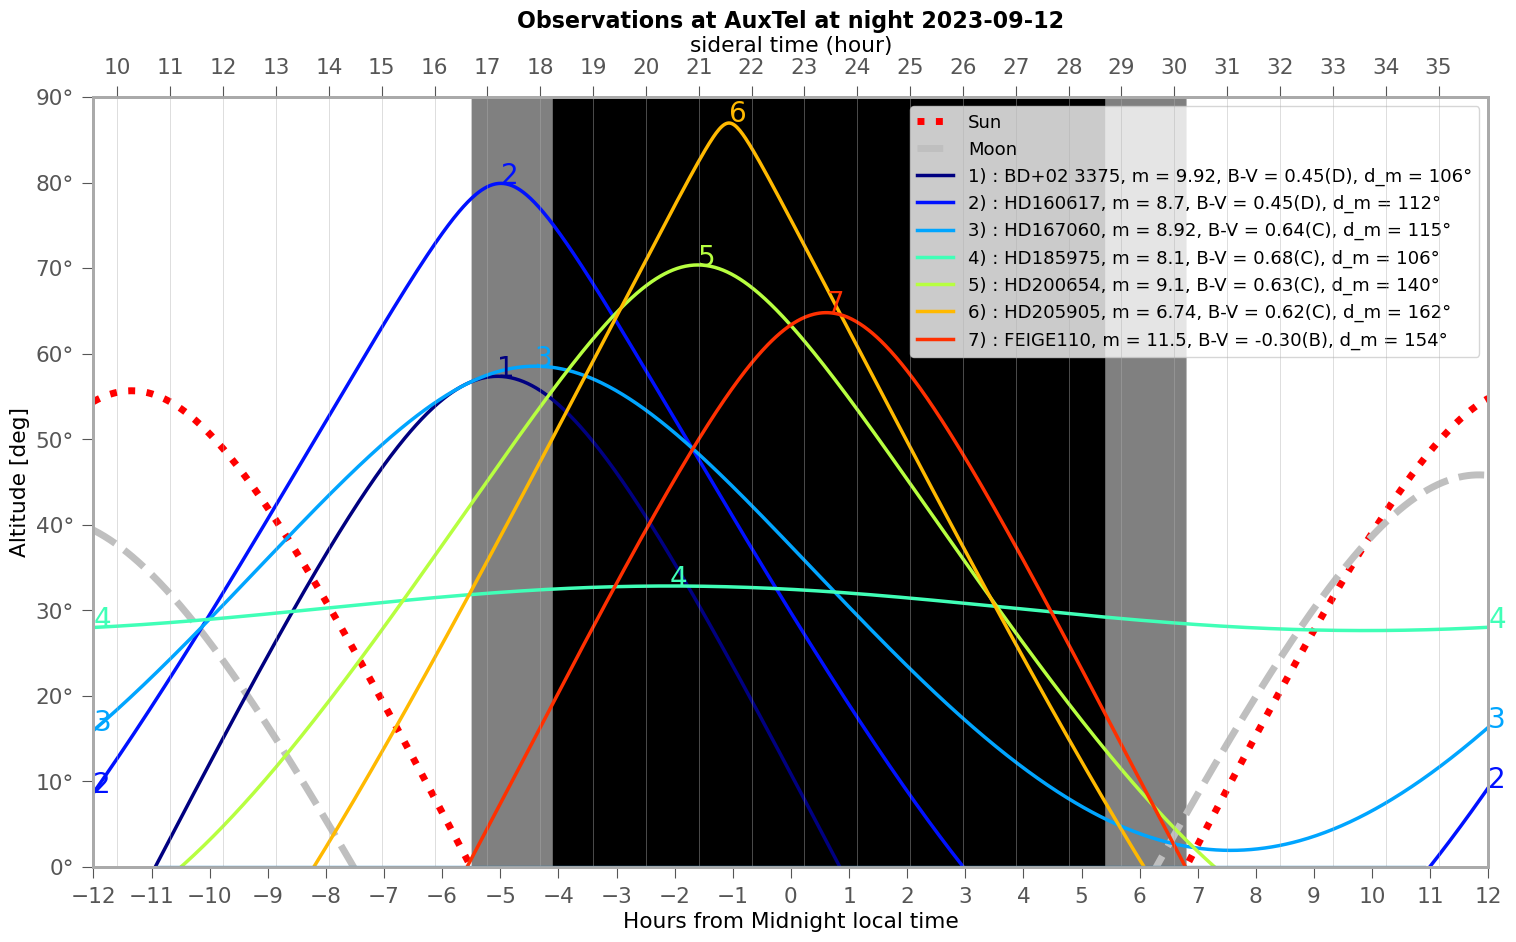

In [82]:
fig = plt.figure(figsize=(18,10))
ax=fig.add_subplot(1,1,1)

# plot sun
ax.plot(delta_midnight, sunaltazs_evening_to_morning.alt, color='r', ls=":",label='Sun',lw=5)
#plot moon
ax.plot(delta_midnight, moonaltazs_evening_to_morning.alt, color=[0.75]*3, ls='--', label='Moon',lw=5)


# loop on selected targets in pandas dataframe t according rank order
for index in range(NTargets):
    
    # select the good row in pandas dataframe from time ordering
    row = (t[t["rank_tmax"] == index]).iloc[0]
    

    # get its tag
    label = str(index+1) + ") : " + row["tag"]
    
    # rank in all_target_altazs_evening_to_morning table
    rank_num = row["rank_num"]
    tmax = row["tmax"]
    altmax = row["alt_max"]
    
    
  
    # plot trajectory
    ax.plot(delta_midnight, all_target_altazs_evening_to_morning[rank_num].alt,label=label, lw=2.5,color=all_colors[index])

    # plot label
    if all_target_altazs_evening_to_morning[rank_num].alt[-1]>0:
        ax.text(delta_midnight[-1], all_target_altazs_evening_to_morning[rank_num].alt[-1], f'{index+1}',color=all_colors[index],fontsize=20)
    if all_target_altazs_evening_to_morning[rank_num].alt[0]>0:
        ax.text(delta_midnight[0], all_target_altazs_evening_to_morning[rank_num].alt[0], f'{index+1}',color=all_colors[index],fontsize=20)
    if altmax>0 :
        ax.text(tmax, altmax, f'{index+1}',color=all_colors[index],fontsize=20)
    


ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,sunaltazs_evening_to_morning.alt < -0*u.deg, color='0.5', zorder=0)
ax.fill_between(delta_midnight, 0*u.deg, 90*u.deg,sunaltazs_evening_to_morning.alt < -18*u.deg, color='k', zorder=0)

ax.legend(loc='upper right')
ax.set_xlim(-12*u.hour, 12*u.hour)
ax.set_xticks((np.arange(13)*2-12)*u.hour)
ax.set_ylim(0*u.deg, 90*u.deg)
ax.set_xlabel('Hours from Midnight local time')
ax.set_ylabel('Altitude [deg]')
ax.grid(None)
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
title = "Observations at AuxTel at night " + night_obs_str.split(" ")[0]
ax.set_title(title)
ax2 = ax.twiny()
ax2.plot([sideral_times[0].hour,sideral_times[-1].hour],[0,0])
ax2.set_xlabel("sideral time (hour)")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax2.grid()
figname="AuxtelStarAlt_{:4d}_{:d}_{:d}.png".format(NYEAR,NMONTH,NDAY)

plt.savefig(figname)
plt.show()

# To plot in staralt

https://www.ing.iac.es//Astronomy/telescopes/wht/catformat.html

In [83]:
t_staralt = t[["Star_name","RA","Decl","rank_tmax"]]
t_staralt["equinox"] = np.full(NTargets,"J2000")
t_staralt = t_staralt.sort_values(by = ['rank_tmax'])
t_staralt = t_staralt.drop(['rank_tmax'], axis=1)

/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_8731/2260111632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_staralt["equinox"] = np.full(NTargets,"J2000")


In [84]:
t_staralt

,Star_name,RA,Decl,equinox
0,BD+02 3375,17 39 45.595,+02 24 59.61,J2000
2,HD160617,17 42 49.324,-40 19 15.51,J2000
3,HD167060,18 17 44.143,-61 42 31.62,J2000
4,HD185975,20 28 18.740,-87 28 19.94,J2000
5,HD200654,21 06 34.751,-49 57 50.28,J2000
6,HD205905,21 39 10.151,-27 18 23.67,J2000
1,FEIGE110,23 19 58.400,-05 09 56.17,J2000


In [85]:
t_staralt.to_csv("staralt.csv",index=False,header=False, sep = " ")

In [86]:
! cat staralt.csv

"BD+02 3375" "17 39 45.595" "+02 24 59.61" J2000
HD160617 "17 42 49.324" "-40 19 15.51" J2000
HD167060 "18 17 44.143" "-61 42 31.62" J2000
HD185975 "20 28 18.740" "-87 28 19.94" J2000
HD200654 "21 06 34.751" "-49 57 50.28" J2000
HD205905 "21 39 10.151" "-27 18 23.67" J2000
FEIGE110 "23 19 58.400" "-05 09 56.17" J2000


# Spheric plot

In [87]:
def makePolarPlot(azimuthsInDegrees, zenithAngles, marker=".",ax=None,
                       title=None, color=None, objName=None,lw=0.5):
    if ax==None:
        _ = plt.figure(figsize=(20, 10))
        ax = plt.subplot(111, polar=True)
        
    ax.plot([a*np.pi/180 for a in azimuthsInDegrees], zenithAngles, marker, c=color, label=objName,lw=lw)
    if title:
        ax.set_title(title, va='bottom')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlim(0, 90)
    return ax

In [88]:
darkTimeIndex=[sunaltazs_evening_to_morning.alt < -18*u.deg]

/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_8731/1712778728.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  moon_azimuthsInDegreesNight=moon_azimuthsInDegrees[darkTimeIndex]
/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_8731/1712778728.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  moon_zenithAnglesNight=moon_zenithAngles[darkTimeIndex]
/var/folders/cq/vms8st5136z3q5xx4rd9xqfr0000gw/T/ipykernel_8731/1712778728.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

Text(0.5, 1.0, 'Observations at AuxTel at night 2023-09-12')

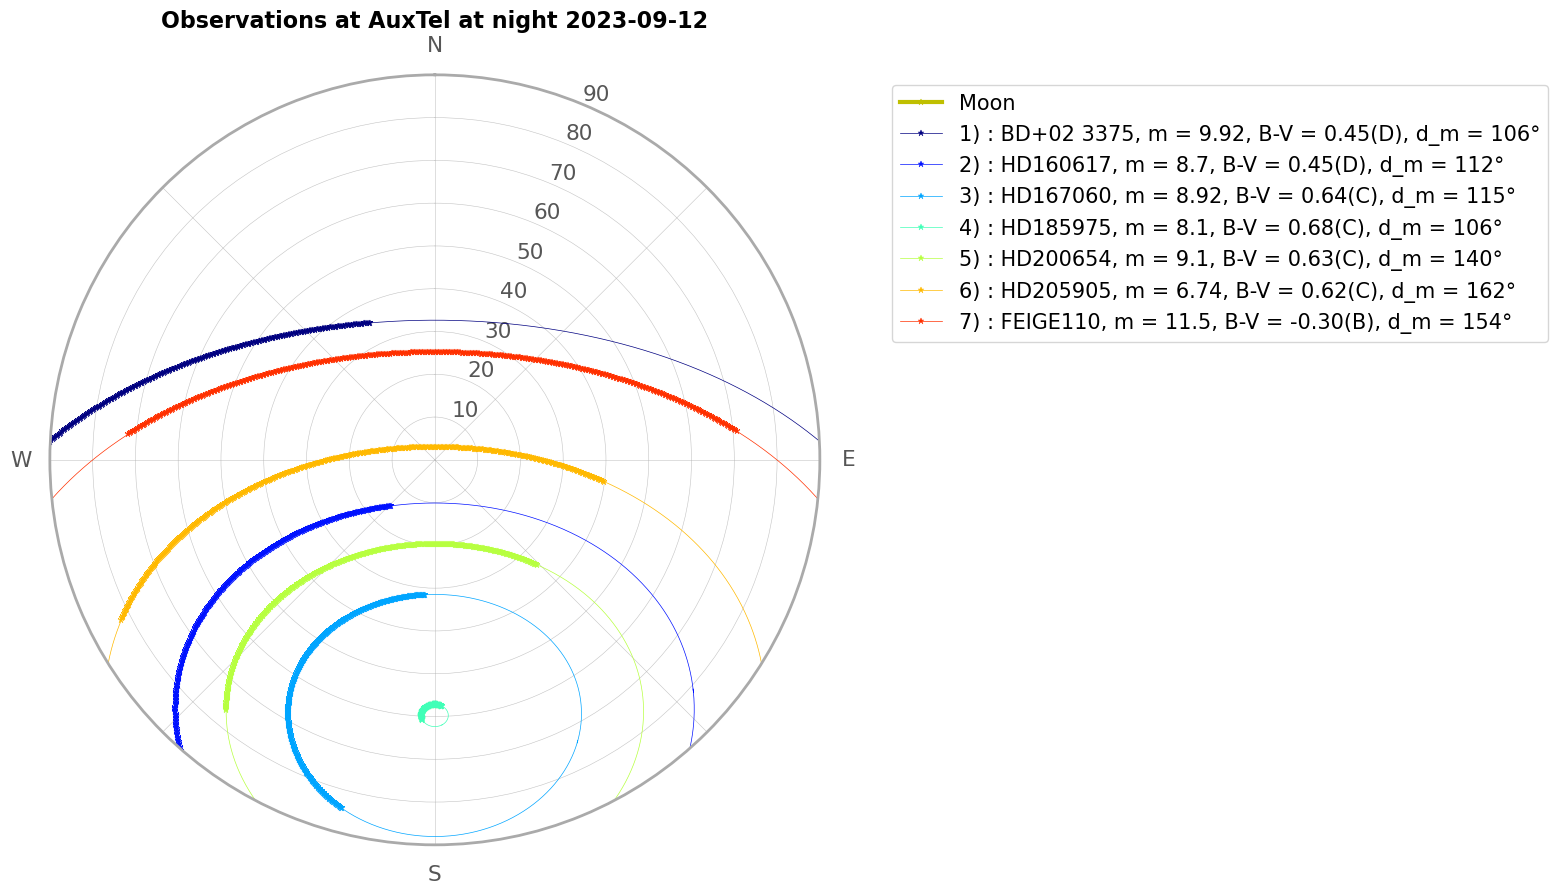

In [89]:
_ = plt.figure(figsize=(20, 10))

ax = plt.subplot(111, polar=True)


darkTimeIndex=[sunaltazs_evening_to_morning.alt < -18*u.deg]

# compute zenith and azimuth angles
moon_azimuthsInDegrees = Angle(moonaltazs_evening_to_morning.az).deg
moon_zenithAngles = Angle(moonaltazs_evening_to_morning.zen).deg

#ax=makePolarPlot(moon_azimuthsInDegrees, moon_zenithAngles,ax=ax, marker="--",color="y", title = None, lw=1)

moon_azimuthsInDegreesNight=moon_azimuthsInDegrees[darkTimeIndex]
moon_zenithAnglesNight=moon_zenithAngles[darkTimeIndex]
ax=makePolarPlot(moon_azimuthsInDegreesNight, moon_zenithAnglesNight,ax=ax ,marker="*-",title=None, color = "y",objName="Moon",lw=3)

    
# loop on selected targets in pandas dataframe t according rank order
for index in range(NTargets):
    
    # select the good row in pandas dataframe from time ordering
    row = (t[t["rank_tmax"] == index]).iloc[0]
    

    # get its tag
    label = str(index+1) + ") : " + row["tag"]
    
    # rank in all_target_altazs_evening_to_morning table
    rank_num = row["rank_num"]
    tmax = row["tmax"]
    altmax = row["alt_max"]
    
    
    
    
    
    # compute zenith and azimuth angles
    azimuthsInDegrees=Angle(all_target_altazs_evening_to_morning[rank_num].az).deg
    zenithAngles = Angle(all_target_altazs_evening_to_morning[rank_num].zen).deg
    
    ax=makePolarPlot(azimuthsInDegrees, zenithAngles,ax=ax, marker="-",title=None, color=all_colors[index], lw=0.5)
    
    azimuthsInDegreesNight=azimuthsInDegrees[darkTimeIndex]
    zenithAnglesNight=zenithAngles[darkTimeIndex]
    ax=makePolarPlot(azimuthsInDegreesNight, zenithAnglesNight,ax=ax ,marker="*-",title=None, color=all_colors[index],objName=label,lw=0.5)
    
    thex=zenithAnglesNight[0]*np.sin( (azimuthsInDegreesNight[0]) *np.pi/180.)
    they=zenithAnglesNight[0]*np.cos( (azimuthsInDegreesNight[0])*np.pi/180.)
   
    #plt.text(thex, they,f'{rank}',color=all_colors[rank],fontsize=20)
    
 
ax.legend(bbox_to_anchor=(1.08, 1), prop={'size': 15}, loc='upper left')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])
title = "Observations at AuxTel at night " + night_obs_str.split(" ")[0]
ax.set_title(title)

# Spectra

In [91]:
from getCalspec.getCalspec import *

In [95]:
plt.rcParams["figure.figsize"]=(8,4)

In [104]:
ncols = 2
nrows = int(np.ceil(NTargets/ncols))

In [117]:
XMIN = 300.
XMAX = 1100.

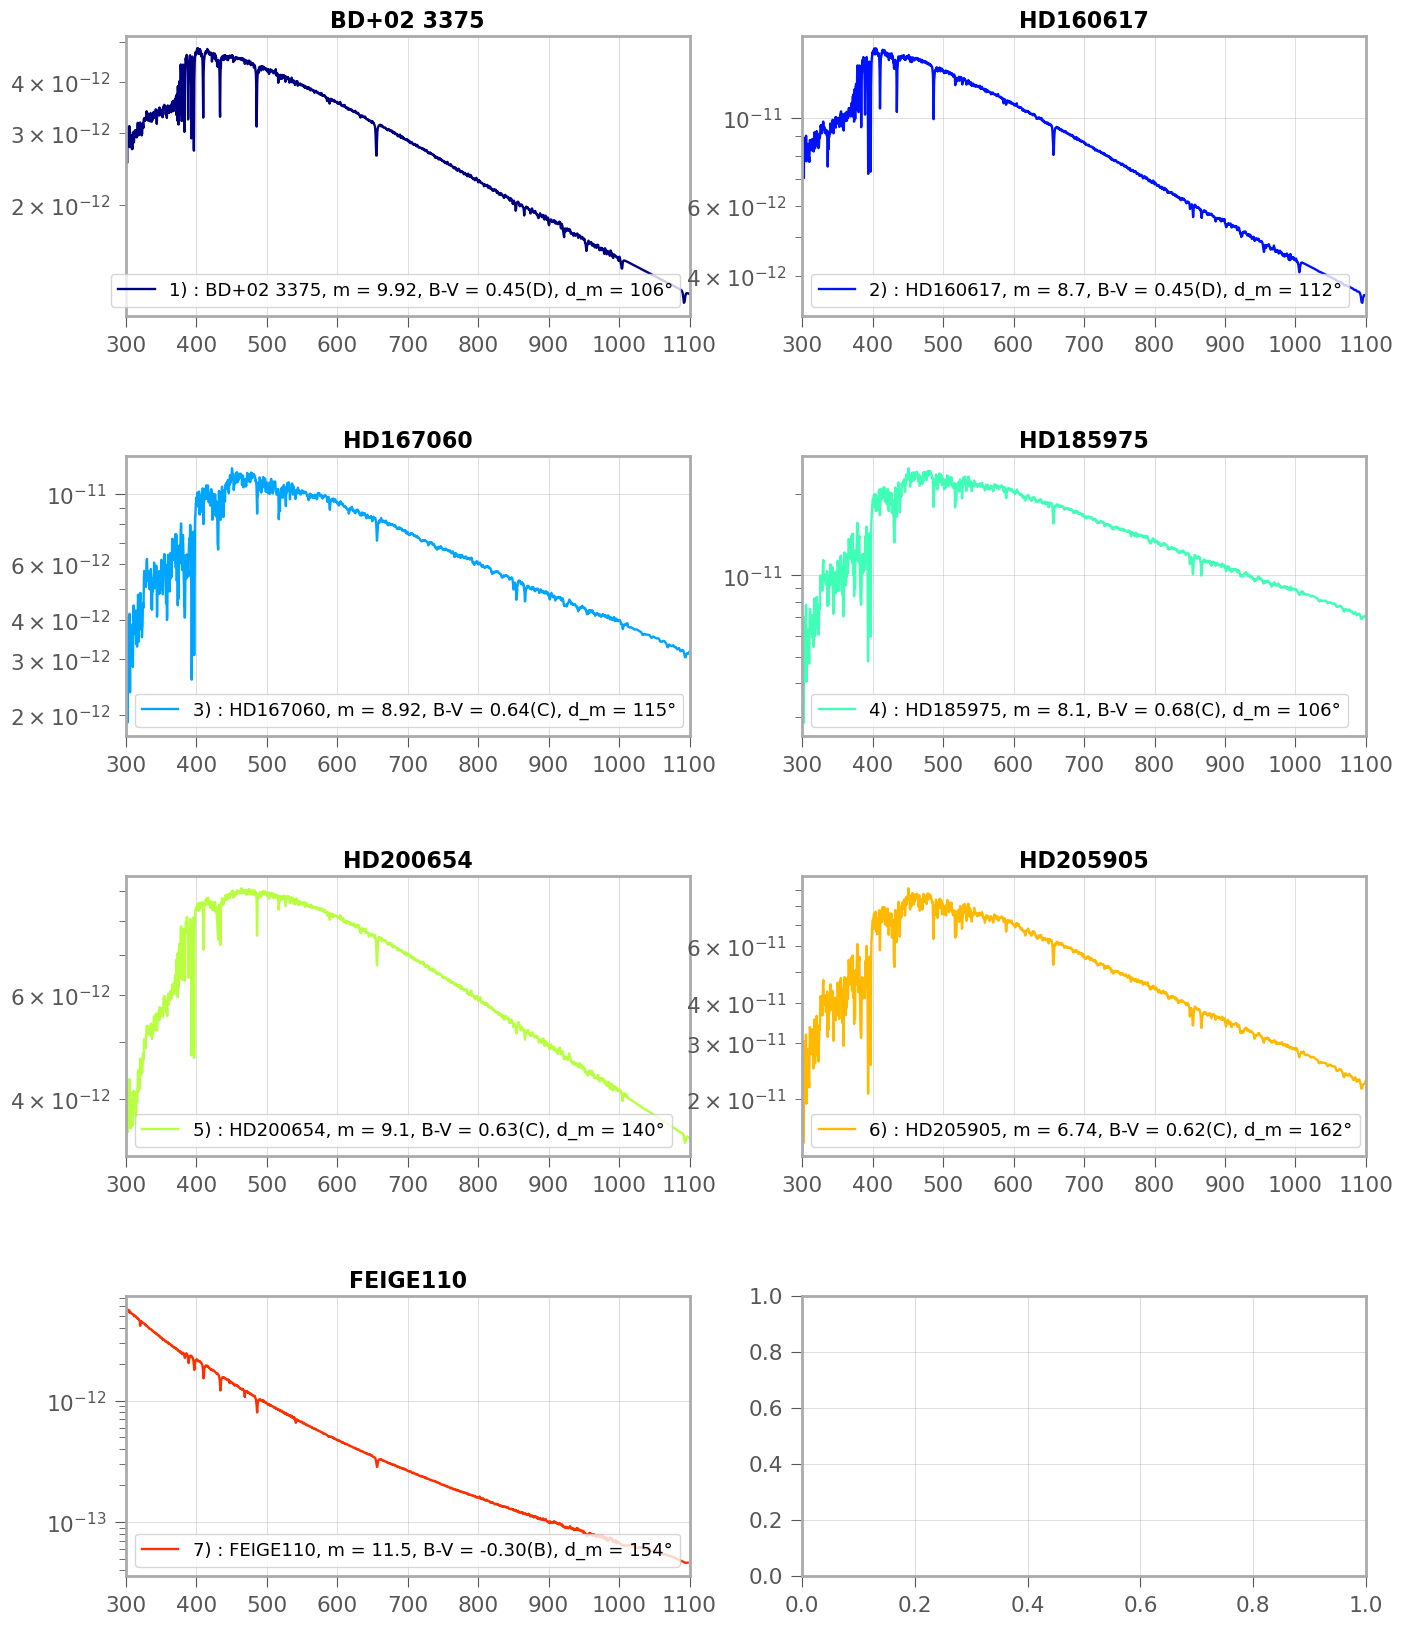

In [120]:
fig, axes= plt.subplots(nrows=nrows,ncols=ncols,sharex=False,figsize=(16,20))

# loop on selected targets in pandas dataframe t according rank order

for index, ax in enumerate(axes.flat):
    
    if index < NTargets:
    
        # select the good row in pandas dataframe from time ordering
        row = (t[t["rank_tmax"] == index]).iloc[0]
    

        # get its tag
        label = str(index+1) + ") : " + row["tag"]
    
        # rank in all_target_altazs_evening_to_morning table
        target_name = row["Star_name"]
    
        test = is_calspec(target_name)
    
        if test:
        
            c = Calspec(target_name)
            c.get_spectrum_fits_filename()  # download the fits file
            tab = c.get_spectrum_table()  # download and return an Astropy table
            arr = c.get_spectrum_numpy()  # download and return a dictionnary of numpy arrays with units
            #c.plot_spectrum()  # download and plot the spectrum
            
            wl = arr['WAVELENGTH'].to_value()/10.
            fl = arr['FLUX'].to_value()*10.
            
            indexes = np.where(np.logical_and(wl>=XMIN,wl<=XMAX))[0]
            
            wl = wl[indexes]
            fl = fl[indexes]
            ax.plot(wl,fl,"-",color=all_colors[index],label=label)
            ax.set_yscale("log")
            ax.set_title(target_name)
            ax.legend()
            ax.set_xlim(XMIN,XMAX)
            
            
        else:
            print(f"{target_name} NOT A CALSPEC")
        
    
    